In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\skesh\Desktop\Data\Tarffic_Violation.csv')
df

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,NaN,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,NaN,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,NaN,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,NaN,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [ ]:
2. WHo overspeeds more. Men or Women
3. Does gender affect who gets searched during a stop?
4. Which year had the least number of stops?
5. How does drug activity change by time of day?
6. Do most stops occur at night?
7. Compare the age distributions for each violation w.r.t age

## 1. Remove the column that only contains missing values

In [3]:
df.isnull()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
91737,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
91738,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
91739,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False


In [4]:
df.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [5]:
df.shape

(91741, 15)

In [6]:
df.drop(columns = "county_name", inplace = True)

In [7]:
df.shape

(91741, 14)

## 2. Who overspeeds more. Men or Women

In [8]:
df.violation.unique()

array(['Speeding', 'Other', 'Equipment', 'Moving violation', nan,
       'Registration/plates', 'Seat belt'], dtype=object)

In [9]:
df[df['violation'] == 'Speeding']

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
6,2005-04-01,17:30,M,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91734,2015-12-31,20:20,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
91735,2015-12-31,20:25,M,1992.0,23.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
91736,2015-12-31,20:27,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [10]:
df[df['violation'] == 'Speeding']['driver_gender'].value_counts()

M    32979
F    15482
Name: driver_gender, dtype: int64

#### when a man is stopped  how often is it for overspeeding

In [11]:
df[df['driver_gender']=='M']

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
5,2005-03-23,09:45,M,1982.0,23.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91735,2015-12-31,20:25,M,1992.0,23.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
91736,2015-12-31,20:27,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [13]:
df[df['driver_gender']=='M']['violation'].value_counts()

Speeding               32979
Moving violation       13020
Equipment               8533
Other                   3627
Registration/plates     2419
Seat belt               2317
Name: violation, dtype: int64

In [14]:
df[df['driver_gender']=='M']['violation'].value_counts(normalize = True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

#### when a woman is stopped  how often is it for overspeeding

In [16]:
df[df['driver_gender']=='F']['violation'].value_counts(normalize = True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

#### combining the above two lines

In [17]:
df.groupby('driver_gender')['violation'].value_counts(normalize = True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

## 3. Does gender affect who gets searched during a stop?

In [19]:
df['search_conducted'].unique()

array([False,  True])

In [21]:
df['search_conducted'].value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [22]:
(3196*1 + 88545*0)/(88545 + 3196)

0.03483720473942948

In [20]:
df['search_conducted'].mean()

0.03483720473942948

In [18]:
df.groupby('driver_gender')['search_conducted'].mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

In [24]:
df.groupby(['driver_race','driver_gender'])['search_conducted'].mean()

driver_race  driver_gender
Asian        F                0.011696
             M                0.025773
Black        F                0.041473
             M                0.070675
Hispanic     F                0.036879
             M                0.067444
Other        F                0.000000
             M                0.014019
White        F                0.015604
             M                0.033895
Name: search_conducted, dtype: float64

## 4. Which year had the least number of stops?

In [27]:
df['stop_date']

0        2005-01-02
1        2005-01-18
2        2005-01-23
3        2005-02-20
4        2005-03-14
            ...    
91736    2015-12-31
91737    2015-12-31
91738    2015-12-31
91739    2015-12-31
91740    2015-12-31
Name: stop_date, Length: 91741, dtype: object

In [61]:
df['stop_date'].str.slice(0,4)

0        2005
1        2005
2        2005
3        2005
4        2005
         ... 
91736    2015
91737    2015
91738    2015
91739    2015
91740    2015
Name: stop_date, Length: 91741, dtype: object

In [30]:
df['stop_date'].str.slice(0,4).value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [31]:
df['stop_date'].str.slice(0,4).value_counts().index

Index(['2012', '2006', '2007', '2014', '2008', '2015', '2011', '2013', '2009',
       '2010', '2005'],
      dtype='object')

In [34]:
least_stop_year = df['stop_date'].str.slice(0,4).value_counts().index[-1]
most_stop_year = df['stop_date'].str.slice(0,4).value_counts().index[0]

#### Alternative way to  capture the year

In [36]:
df['stop_date'].dtypes

dtype('O')

In [43]:
combined = df['stop_date'].str.cat(df['stop_time'],sep=' ')
combined

0        2005-01-02 01:55
1        2005-01-18 08:15
2        2005-01-23 23:15
3        2005-02-20 17:15
4        2005-03-14 10:00
               ...       
91736    2015-12-31 20:27
91737    2015-12-31 20:35
91738    2015-12-31 20:45
91739    2015-12-31 21:42
91740    2015-12-31 22:46
Name: stop_date, Length: 91741, dtype: object

In [47]:
df['stop_datetime'] = pd.to_datetime(combined)

In [49]:
df[['stop_date','stop_time','stop_datetime']]

,stop_date,stop_time,stop_datetime
0,2005-01-02,01:55,2005-01-02 01:55:00
1,2005-01-18,08:15,2005-01-18 08:15:00
2,2005-01-23,23:15,2005-01-23 23:15:00
3,2005-02-20,17:15,2005-02-20 17:15:00
4,2005-03-14,10:00,2005-03-14 10:00:00
...,...,...,...
91736,2015-12-31,20:27,2015-12-31 20:27:00
91737,2015-12-31,20:35,2015-12-31 20:35:00
91738,2015-12-31,20:45,2015-12-31 20:45:00
91739,2015-12-31,21:42,2015-12-31 21:42:00


In [58]:
df['stop_datetime'].dt.year.value_counts().index[-1]

2005

In [59]:
df['stop_datetime'].dt.year.value_counts().index[0]

2012

## 5. How does drug activity change by time of day?

In [78]:
df.drugs_related_stop.unique()

array([False,  True])

In [79]:
#baseline rate
df.drugs_related_stop.mean()

0.008883705213590434

In [80]:
df['stop_datetime'].dt.hour

0         1
1         8
2        23
3        17
4        10
         ..
91736    20
91737    20
91738    20
91739    21
91740    22
Name: stop_datetime, Length: 91741, dtype: int64

In [81]:
df.groupby(df['stop_datetime'].dt.hour)['drugs_related_stop'].mean()

stop_datetime
0     0.019728
1     0.013507
2     0.015462
3     0.017065
4     0.011811
5     0.004762
6     0.003040
7     0.003281
8     0.002687
9     0.006288
10    0.005714
11    0.006976
12    0.004467
13    0.010326
14    0.007810
15    0.006416
16    0.005723
17    0.005517
18    0.010148
19    0.011596
20    0.008084
21    0.013342
22    0.013533
23    0.016344
Name: drugs_related_stop, dtype: float64

In [70]:
hours = df.groupby(df['stop_datetime'].dt.hour)['drugs_related_stop'].mean().index
rate_of_drug_stops = df.groupby(df['stop_datetime'].dt.hour)['drugs_related_stop'].mean().values

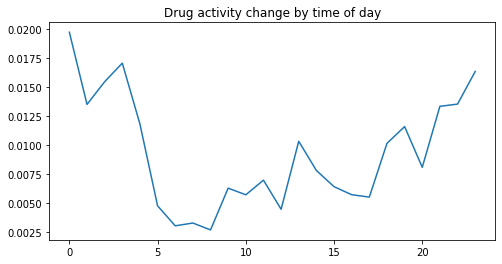

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize =(8,4))

plt.plot(hours,rate_of_drug_stops)
plt.title('Drug activity change by time of day')
plt.show()

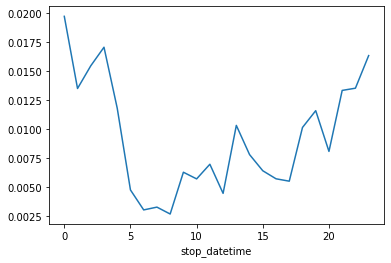

In [103]:
#use pandas
df.groupby(df['stop_datetime'].dt.hour)['drugs_related_stop'].mean().plot()
plt.show()

## 6. Do most stops occur at night?

In [82]:
df['stop_datetime'].dt.hour

0         1
1         8
2        23
3        17
4        10
         ..
91736    20
91737    20
91738    20
91739    21
91740    22
Name: stop_datetime, Length: 91741, dtype: int64

In [83]:
df['stop_datetime'].dt.hour.value_counts()

10    7350
9     6838
11    5877
14    5634
23    5629
0     5221
8     5210
13    4842
15    4832
7     4572
1     4442
16    3844
12    3582
22    3473
20    3340
6     3290
2     2975
17    2900
19    2587
18    2168
21    1499
3     1172
4      254
5      210
Name: stop_datetime, dtype: int64

In [92]:
df['stop_datetime'].dt.hour.value_counts().sort_index()

0     5221
1     4442
2     2975
3     1172
4      254
5      210
6     3290
7     4572
8     5210
9     6838
10    7350
11    5877
12    3582
13    4842
14    5634
15    4832
16    3844
17    2900
18    2168
19    2587
20    3340
21    1499
22    3473
23    5629
Name: stop_datetime, dtype: int64

In [93]:
# hours = df['stop_datetime'].dt.hour.value_counts().index
# stops = df['stop_datetime'].dt.hour.value_counts().values
hours = df['stop_datetime'].dt.hour.value_counts().sort_index().index
stops = df['stop_datetime'].dt.hour.value_counts().sort_index().values

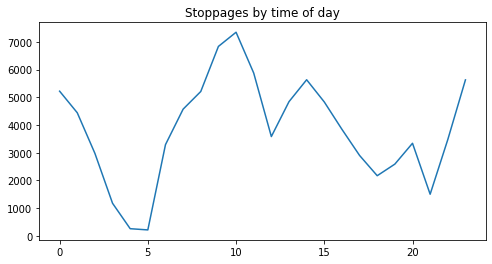

In [94]:
import matplotlib.pyplot as plt
plt.figure(figsize =(8,4))

plt.plot(hours,stops)
plt.title('Stoppages by time of day')
plt.show()

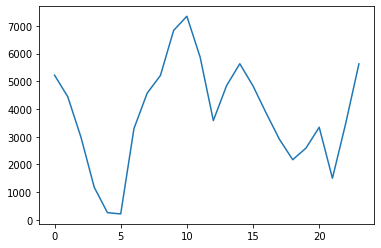

In [102]:
#using pandas
df['stop_datetime'].dt.hour.value_counts().sort_index().plot()
plt.show()

## 7. Compare the age distributions for violation w.r.t age

C:\Users\skesh\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\skesh\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


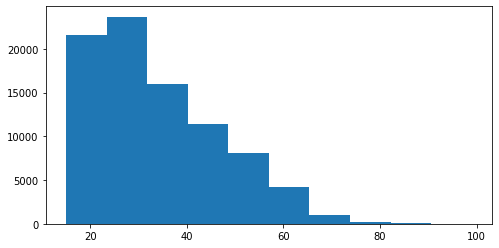

In [96]:
plt.figure(figsize =(8,4))

plt.hist(df['driver_age'])
plt.show()

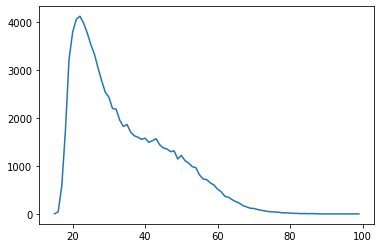

In [101]:
df['driver_age'].value_counts().sort_index().plot()

In [106]:
df.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_datetime
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-02 01:55:00
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-18 08:15:00


In [105]:
df.head(2).T

,0,1
stop_date,2005-01-02,2005-01-18
stop_time,01:55,08:15
driver_gender,M,M
driver_age_raw,1985,1965
driver_age,20,40
driver_race,White,White
violation_raw,Speeding,Speeding
violation,Speeding,Speeding
search_conducted,False,False
search_type,NaN,NaN
